In [2]:
import numpy as np
import bima
from matplotlib import pyplot as plt
from bima import Config

In [16]:
arr = np.array([[1, -0.5, 0, 0, 0, -0.4, 0], [2, 0.5, 0, 0, 0, 0.5, 0]])
initial = bima.Initial.from_arr(arr)
print(initial)

[Initial(m=1.000000000, r=(-0.500000000, 0.000000000, 0.000000000), v=(0.000000000, -0.400000000, 0.000000000)), Initial(m=2.000000000, r=(0.500000000, 0.000000000, 0.000000000), v=(0.000000000, 0.500000000, 0.000000000))]


In [20]:
config = Config(
    force=bima.ForceMethod.Direct,
    solve=bima.SolveMethod.Euler,
    timestep=bima.TimestepMethod.Constant(0.00001),
    close_encounter=bima.CloseEncounterMethod.Regularized
)

sim = bima.Simulation(initial)

sim.run(config, 2)

 ... (more hidden) ... ... (more hidden) ... ... (more hidden) ...100%|| 1000/1000 [00:00<00:00, 15509.09it/s]


In [21]:
record = np.array(sim.record())
print(record.shape)
print(record[0, :5])

(2, 200001, 7)
[[ 0.00000000e+00 -5.00000000e-01  0.00000000e+00  0.00000000e+00
   1.66666667e-01 -6.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00 -5.00000000e-01 -6.00000000e-06  0.00000000e+00
   1.66686667e-01 -6.00000000e-01  0.00000000e+00]
 [ 1.00000000e-05 -5.00000000e-01 -1.20000000e-05  0.00000000e+00
   1.66706667e-01 -6.00000000e-01  0.00000000e+00]
 [ 2.00000000e-05 -4.99999999e-01 -1.80000000e-05  0.00000000e+00
   1.66726667e-01 -5.99999999e-01  0.00000000e+00]
 [ 3.00000000e-05 -4.99999999e-01 -2.40000000e-05  0.00000000e+00
   1.66746667e-01 -5.99999999e-01  0.00000000e+00]]


/tmp/ipykernel_84679/1224891968.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


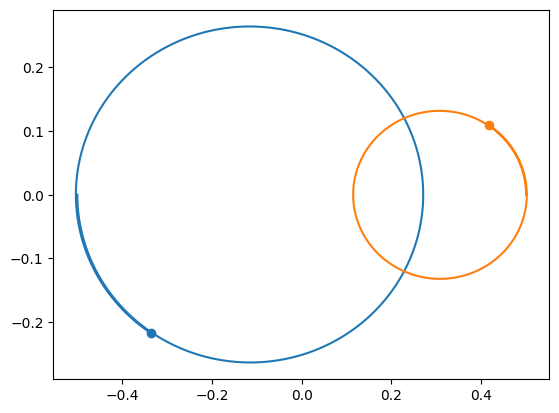

In [22]:
x1 = record[0, ::1, 1]
y1 = record[0, ::1, 2]
x2 = record[1, ::1, 1]
y2 = record[1, ::1, 2]
fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.scatter(x1[-1], y1[-1])
ax.plot(x2, y2)
ax.scatter(x2[-1], y2[-1])
fig.show()